<a href="https://colab.research.google.com/github/marcos-code/sigmoidal_datascience/blob/main/An%C3%A1lise_Dataset_automotivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Dados Automotivo

Quem nunca perdeu um final de semana ou noites para encontrar aquele carro dos sonhos com caracteristicas únicas que só nos amantes de carros sabemos bem como é difícil encontrar um carro do jeito que queremos e com todos os opcionais que gostaríamos nele. Com esse conjunto de dados com caracteristicas automotiva disponibilizado pelo portal [Kaggle](https://www.kaggle.com/toramky/automobile-dataset?select=Automobile_data.csv) vamos analisar cararteristicas de alguns carros encontrado nesse Dataset.


![](https://image.freepik.com/vetores-gratis/carro-sedan-de-luxo-iluminado-na-escuridao-com-farois-e-luzes-traseiras-iluminado-reflexao-imagem-realista_1284-28803.jpg)





# Obtenção dos dados
O dados foram coletados pelo portal [Kaggle](https://www.kaggle.com/datasets?search=automotive) que é uma das maiores plataforma de competição de sobre ciência de dados.

In [60]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [61]:
# importando os dados para análise
df = pd.read_csv('https://raw.githubusercontent.com/marcos-code/datasets_pandas/main/Automobile_data.csv', na_values=['?'])
# alguns valores pode ser percebidos como (?) por isso substituimos por valores nan

#Dicionario Dataset

* symboling	- simbolização
* normalized-losses	- perdas normalizadas
* make - marca do carro	
* fuel-type	- tipo combustível
* aspiration - aspiração	
* num-of-doors - numero de portas
* body-style - se o carro é conversível, tipo do carro
* drive-wheels - tipo de tração	
* engine-location	- localização do motor se é na parta de trás ou da frente
* wheel-base - distância entre eixos	
* length - comprimento
* width	- largura
* height - altura
* curb-weight	
* engine-type - tipo do motor	
* num-of-cylinders - numero de cinlindro
* engine-size	- tamanho do motor
* fuel-system	- sistema de combustível
* bore	
* stroke	
* compression-ratio	- relação compreensão
* horsepower - potência
* peak-rpm - quilometragem rodada
* city-mpg - quanto faz por litro na cidade
* highway-mpg	- quanto faz por litro na estrada
* price - preço

In [62]:
# Visualizando o conjunto de dados, 5 primeiras entradas
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [104]:
# vendo o final do dataset
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [102]:
# vendo quantas linhas e colunas nosso dataset possui
print("Linhas:\t {}".format(df.shape[0]))
print("Colunas:\t{}\n".format(df.shape[1]))

# verificando as entradas
display(df.dtypes)

Linhas:	 205
Colunas:	26



symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [66]:
# vou ordenar de forma crescente os valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

normalized-losses    20.00000
price                 1.95122
stroke                1.95122
bore                  1.95122
peak-rpm              0.97561
horsepower            0.97561
num-of-doors          0.97561
length                0.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
height                0.00000
width                 0.00000
highway-mpg           0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
compression-ratio     0.00000
city-mpg              0.00000
symboling             0.00000
dtype: float64

Podemos ver que a coluna normalized possui 20% de seus valores faltentes Vamos ver a distribuição das variáveis em um histograma.


In [74]:
# vendo o resumo estatistico das variáveis
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


* Podemos perceber que 75% do valor está abaixo de 16500 e seu valor máximo é de 45400
* O valor mínimo é de 5118 #Boxplot para price


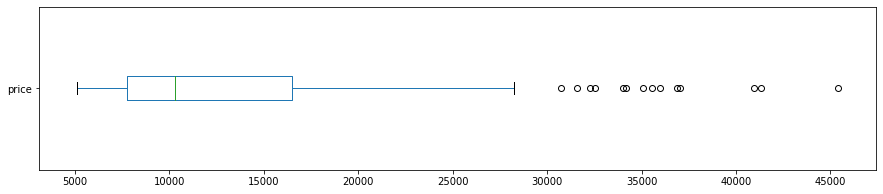

In [78]:
df.price.plot(kind='box', vert=False, figsize=(15,3));

Realmente podemos ver que possuímos alguns outliers em relação ao preço dos carros.

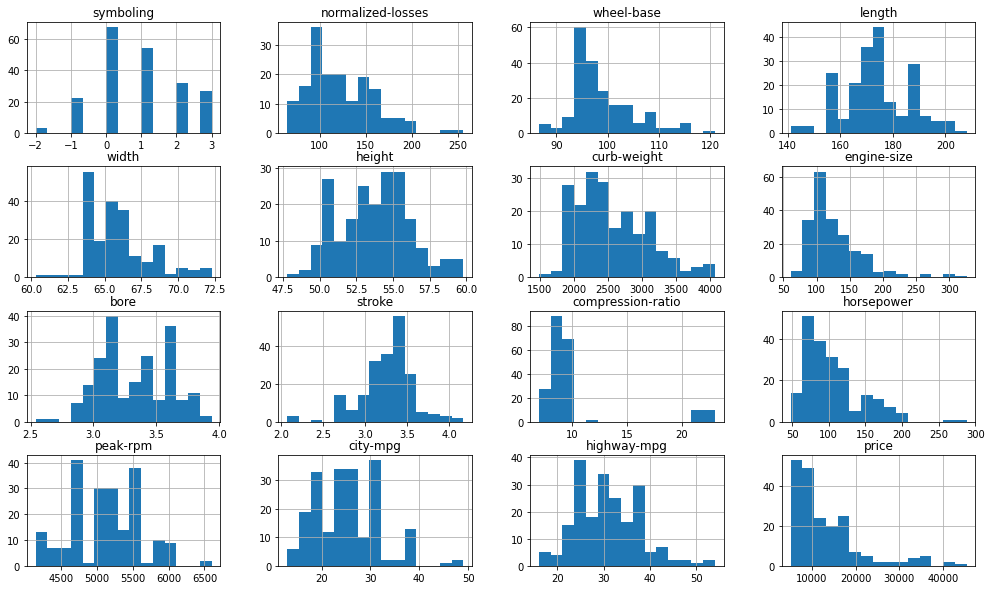

In [67]:
df.hist(bins=15, figsize=(17,10));

Eu consigo excluir tanto linhas com valores ausentes quanto colunas inteiras. Para que o Pandas saiba se a sua inteção é de eliminar linhas (axis=0) ou colunas (axis=1), você deve informar dentro do método dropna().

In [72]:
# Fazendo uma cópia do dataset e limpando valores ausentes price
df_clean = df.dropna(subset=['price', 'horsepower'],axis=0)

# comparando o antes e depois da limpeza
print("Antes:\t{}".format(df.shape))
print("Depois:\t{}".format(df_clean.shape))


Antes:	(205, 26)
Depois:	(199, 26)


In [73]:
df_clean.isnull().sum()

symboling             0
normalized-losses    35
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Podemos perceber que price e horsepower não possui valores ausentes, vamos limpar agora valores ausentes de horsepower

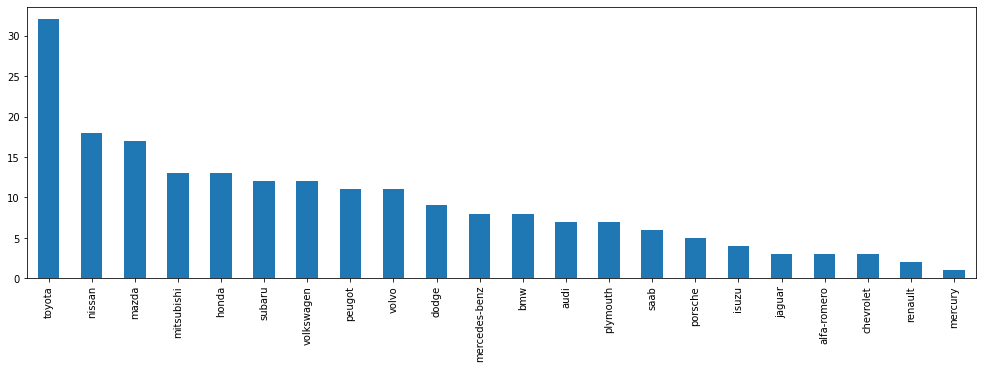

In [91]:
# Vamos ver as marcas de carros que nosso Dataset possui
df['make'].value_counts().plot(kind='bar', figsize=(17,5));

In [90]:
# Carro mais caro
df[df['price'] == df['price'].max()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,1,NaN,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.8,3.35,8.0,184.0,4500.0,14,16,45400.0


Nosso carro mais caro pe um Mercedes benz a gasolina, 2 portas, motor v8 custando 45400


In [87]:
#Carro mais barato
df[df['price'] == df['price'].min()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
138,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69.0,4900.0,31,36,5118.0


Nosso carro mais barato seria um SUbaru, gasolina, 2 portas, 4 cilindros custando 5118

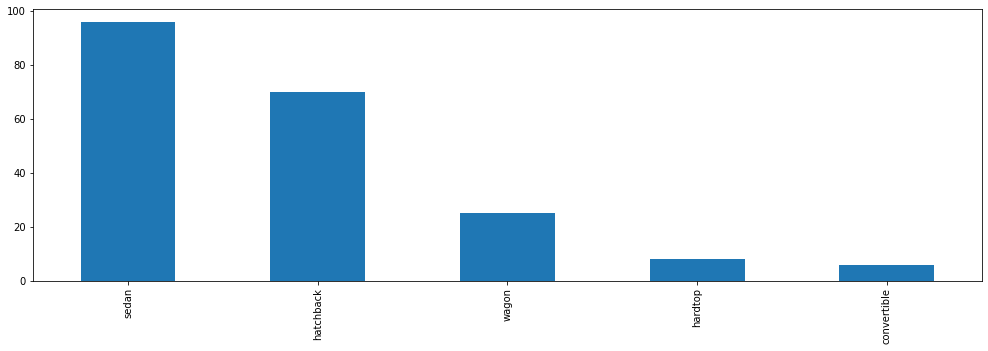

In [99]:
# Tipos de carros
df['body-style'].value_counts().plot(kind='bar', figsize=(17,5));

In [101]:
# tipo de combustível
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

os carros disponíveis são a gasolina e diesel


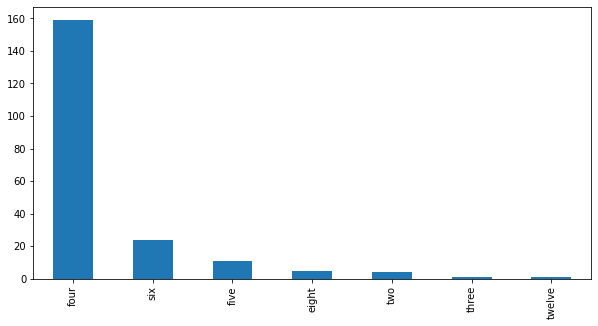

In [119]:
# Quantidade de carros por cilindrada
df['num-of-cylinders'].value_counts().plot(kind='bar', figsize=(10,5));

#Conclusão
Aqui nesse dataset fizemos uma simples análise para descobir alguns insigths para saber quais os carros disponíveis para a venda, preço,   tipos de combustíveis,  se o carro é conversível, hatback, sedan, hardtop ou wagon e o mais importante o coração do carro, quantas cilindradas possuem, particularmente os v8 são show de bola.
Aqui pesquisamos tudo o que precisamos saber ao comprar um carro, sempre ficamos em dúvidas sobre qual escolher mas sem sombra de dúvidas sempre pesquisamos aquele carro que seja a nossa cara, único, confiável, condortável para que não tenhamos dor de cabeça lá na frente, por isso que temos que ter esse cuidado ao escolher um carro, seja ele para o trabalho do dia a dia ou para o lazer com a família.